In [74]:
#getting and working with data
import pandas as pd
import numpy as np
import re
import os
from itertools import groupby
import datetime as dt

#visualizing results
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#import yellowbrick as yb

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import warnings; warnings.simplefilter('ignore')
np.set_printoptions(suppress=True)

In [75]:
#read in task df

path_task = 'C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/probability_discounting/task.csv'
    
task = pd.read_csv(path_task, index_col=0)
task = pd.DataFrame(data = task)

print(task.shape)

task.head(10)

(1917, 17)


,date,animal_number,session,sub_session,trial_num,high_reward_lever,reinforcement_count,right_lever_count,right_lever_latency,left_lever_count,left_lever_latency,HE_trial_count,HE_trial_latency_1st,HE_wait,rt_reward,lt_reward,prob_lever
0,190729,683,100,choice,0,1,1,0,0.00,1,0.81,1,0.13,NaN,2,1,0
1,190729,683,100,choice,1,1,2,1,1.36,0,0.00,1,0.09,1.0,2,1,0
2,190729,683,100,choice,2,1,1,0,0.00,1,3.27,3,1.39,0.0,2,1,0
3,190729,683,100,choice,3,1,1,0,0.00,1,0.80,1,0.21,8.0,2,1,0
4,190729,683,100,choice,4,1,2,1,1.62,0,0.00,2,0.05,11.0,2,1,0
5,190729,683,100,choice,5,1,2,1,1.13,0,0.00,0,0.00,1.0,2,1,0
6,190729,683,100,choice,6,1,2,1,1.48,0,0.00,0,0.00,14.0,2,1,0
7,190729,683,100,choice,7,1,2,1,1.85,0,0.00,0,0.00,28.0,2,1,0
8,190729,683,100,choice,8,1,2,1,1.12,0,0.00,1,0.21,5.0,2,1,0
9,190729,683,100,choice,9,1,2,1,0.93,0,0.00,0,0.00,3.0,2,1,0


In [78]:
task.groupby('session').mean()

,date,animal_number,trial_num,high_reward_lever,reinforcement_count,right_lever_count,right_lever_latency,left_lever_count,left_lever_latency,HE_trial_count,HE_trial_latency_1st,HE_wait,rt_reward,lt_reward,prob_lever
session,,,,,,,,,,,,,,,
25,190801.000000,689.531401,11.065217,1.671498,0.782609,0.403382,0.987319,0.594203,0.988333,0.509662,0.184686,4.796296,1.328502,1.671498,1.671498
50,190744.036437,690.186235,10.825911,1.631579,1.002024,0.425101,1.016802,0.560729,0.957551,0.601215,0.250526,5.937778,1.368421,1.631579,1.631579
75,190730.188377,690.324649,10.907816,1.633267,1.266533,0.434870,1.173627,0.545090,1.094770,0.845691,0.341303,5.980220,1.366733,1.633267,1.633267
100,190728.088235,690.190196,11.133333,1.641176,1.523529,0.384314,1.483431,0.549020,1.757471,1.684314,0.579216,3.311159,1.358824,1.641176,0.000000


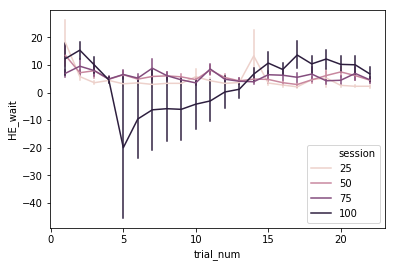

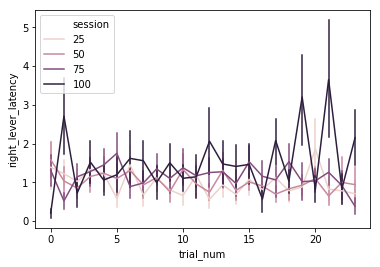

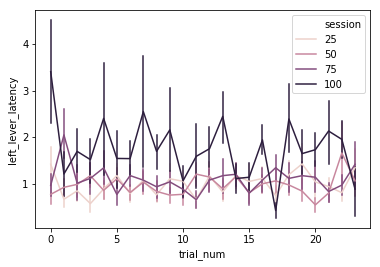

In [79]:
sns.lineplot(x='trial_num', y='HE_wait', data=task, hue='session', err_style="bars", ci=68)
plt.show()
sns.lineplot(x='trial_num', y='right_lever_latency', data=task, hue='session', err_style="bars", ci=68)
plt.show()
sns.lineplot(x='trial_num', y='left_lever_latency', data=task, hue='session', err_style="bars", ci=68)

In [80]:
path_animal_info = 'C:/Users/Schindler/Documents/Schindler_Lab/Data/Analysis/Excel files/Med boxes/PD_round1.xlsx'

animal_info = pd.read_excel(path_animal_info)
animal_info = pd.DataFrame(data = animal_info)

animal_info.rename(columns={"animal": "animal_number"}, inplace=True)
print(animal_info.shape)

animal_info.head()

(19, 4)


,animal_number,high_reward,cage,group
0,684,2,2,1
1,685,2,2,1
2,686,2,2,1
3,693,1,5,1
4,694,1,5,1


In [81]:
df_final = (task.merge(animal_info,
                on=['animal_number'], how='left'))
df_final.head()

,date,animal_number,session,sub_session,trial_num,high_reward_lever,reinforcement_count,right_lever_count,right_lever_latency,left_lever_count,left_lever_latency,HE_trial_count,HE_trial_latency_1st,HE_wait,rt_reward,lt_reward,prob_lever,high_reward,cage,group
0,190729,683,100,choice,0,1,1,0,0.00,1,0.81,1,0.13,NaN,2,1,0,1,1,2
1,190729,683,100,choice,1,1,2,1,1.36,0,0.00,1,0.09,1.0,2,1,0,1,1,2
2,190729,683,100,choice,2,1,1,0,0.00,1,3.27,3,1.39,0.0,2,1,0,1,1,2
3,190729,683,100,choice,3,1,1,0,0.00,1,0.80,1,0.21,8.0,2,1,0,1,1,2
4,190729,683,100,choice,4,1,2,1,1.62,0,0.00,2,0.05,11.0,2,1,0,1,1,2


In [82]:
df_final.groupby(['animal_number', 'session'])['date'].value_counts()

animal_number  session  date  
683            25       190801    46
               50       190731    46
               75       190730    43
               100      190729    44
684            25       190801    48
               50       190731    44
               75       190730    45
               100      190726    48
685            25       190801    48
               50       190731    48
               75       190730    46
               100      190726    47
686            25       190801    48
               50       190731    46
               75       190730    44
               100      190726    48
689            25       190801    38
               50       190731    34
               75       190730    39
               100      190729    43
690            25       190801    48
               50       190731    48
               75       190730    46
               100      190729    47
692            50       190801    47
               75       190731    48
       

In [84]:
#make new df with high reward vs low reward columns by session

pd_df_session = pd.DataFrame()

animals = df_final['animal_number'].unique()

for animal in animals:
    
    #get animal data
    animal_data = df_final[df_final['animal_number'] == animal]
    
    #generate session df
    sessions = animal_data['session'].unique()
    
    for session in sessions:
        #get session data for animal
        animal_data_session = animal_data[animal_data['session'] == session]
        
        #generate session df
        sub_sessions = animal_data_session['sub_session'].unique()
    
        for sub in sub_sessions:
            #get sub_session data for animal
            animal_data_sub_session = animal_data_session[animal_data_session['sub_session'] == sub]
            
            pd_df_session_int = pd.DataFrame()
    
            #fill meta data
            pd_df_session_int['date'] = animal_data_sub_session['date'].unique()
            pd_df_session_int['cage'] = animal_data_sub_session['cage'].unique()
            pd_df_session_int['animal_number'] = animal_data_sub_session['animal_number'].unique()
            pd_df_session_int['group'] = animal_data_sub_session['group'].unique()
            pd_df_session_int['session'] = session
            pd_df_session_int['sub_session'] = sub
        
            #compute and fill session data
            if animal_data_sub_session['high_reward_lever'].unique() == 1:
                pd_df_session_int['high_reward_lever'] = 'right'
                pd_df_session_int['reinforcement_count'] = animal_data_sub_session['reinforcement_count'].sum()
                pd_df_session_int['high_reward_lever_count'] = animal_data_sub_session['right_lever_count'].sum()
                pd_df_session_int['high_reward_lever_latency_ave'] = animal_data_sub_session['right_lever_latency'].mean()
                pd_df_session_int['low_reward_lever_count'] = animal_data_sub_session['left_lever_count'].sum()
                pd_df_session_int['low_reward_lever_latency_ave'] = animal_data_sub_session['left_lever_latency'].mean()
        
            elif animal_data_sub_session['high_reward_lever'].unique() == 2:
                pd_df_session_int['high_reward_lever'] = 'left'
                pd_df_session_int['reinforcement_count'] = animal_data_sub_session['reinforcement_count'].sum()
                pd_df_session_int['high_reward_lever_count'] = animal_data_sub_session['left_lever_count'].sum()
                pd_df_session_int['high_reward_lever_latency_ave'] = animal_data_sub_session['left_lever_latency'].mean()
                pd_df_session_int['low_reward_lever_count'] = animal_data_sub_session['right_lever_count'].sum()
                pd_df_session_int['low_reward_lever_latency_ave'] = animal_data_sub_session['right_lever_latency'].mean()
            
            pd_df_session_int['high_reward_prob'] = pd_df_session_int['high_reward_lever_count'] / \
                (pd_df_session_int['high_reward_lever_count'] + pd_df_session_int['low_reward_lever_count']) * 100
            
            pd_df_session = pd_df_session.append(pd_df_session_int)
        
pd_df_session.reset_index(inplace=True, drop=True)    
pd_df_session.head()

,date,cage,animal_number,group,session,sub_session,high_reward_lever,reinforcement_count,high_reward_lever_count,high_reward_lever_latency_ave,low_reward_lever_count,low_reward_lever_latency_ave,high_reward_prob
0,190729,1,683,2,100,choice,right,35,12,0.659130,11,1.106522,52.173913
1,190729,1,683,2,100,force,right,31,10,0.784762,11,1.495714,47.619048
2,190730,1,683,2,75,choice,right,27,11,0.617917,13,1.538750,45.833333
3,190730,1,683,2,75,force,right,20,9,1.330526,10,1.586842,47.368421
4,190731,1,683,2,50,choice,right,24,2,0.096667,22,1.525417,8.333333


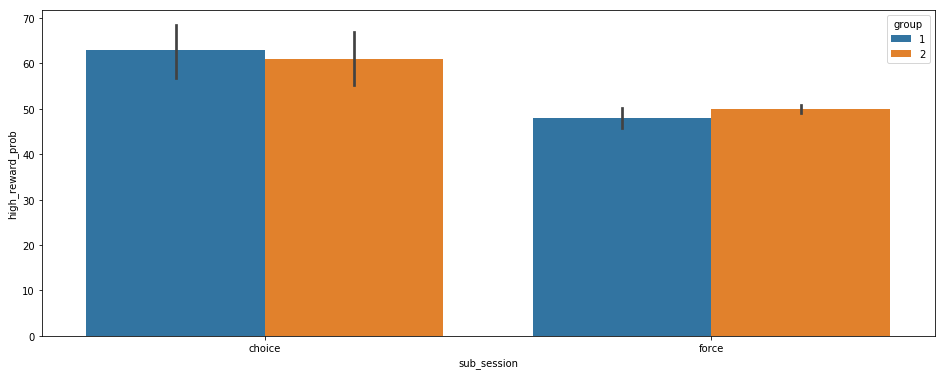

In [85]:
plt.figure(figsize=(16, 6))
g = sns.barplot(x='sub_session', y='high_reward_prob', data=pd_df_session, ci=68, hue='group')

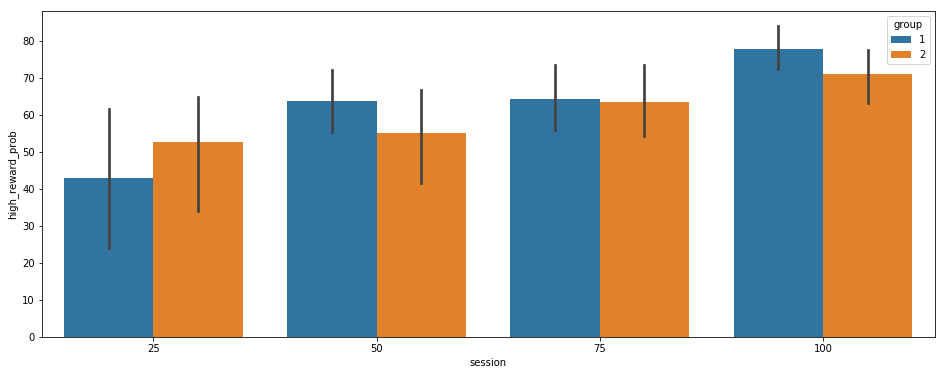

In [87]:
plt.figure(figsize=(16, 6))
g = sns.barplot(x='session', y='high_reward_prob', data=pd_df_session[pd_df_session['sub_session'] == 'choice'], ci=68, hue='group')

In [88]:
pd_df_session.to_csv('pd_df_session.csv')